In [ ]:
""" code-example for finding analogys with FastText
"""

In [1]:
# all imports
import re
import numpy as np
import fasttext
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.stem.snowball import GermanStemmer

In [2]:
# download stopwords
nltk.download('stopwords')
# loads german stopwords
german_stopwords = stopwords.words('german')

[nltk_data] Downloading package stopwords to /home/therau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# read text in
path_to_txt = 'data/text.txt'
file = open(path_to_txt, "r")
text = file.read().replace("\n", " ")
file.close()

In [4]:
# replacing special chars in the text
text = text.lower()
text = text.replace('ä', 'ae')
text = text.replace('ö', 'oe')
text = text.replace('ü', 'ue')
text = text.replace('ß', 'ss')
text = re.sub('[^a-zA-Z ]+', '', text)
text = re.sub('!.', '', text)

In [5]:
stemmed_list = []

# splits inputtext
part_list = text.split()
# stems input words
for word in part_list:
    plural = word.endswith("en")  #for deciding if we are looking for "in" or "inn"
    stemmed_word = GermanStemmer().stem(word)
    feminine_suffix = "in" if not plural else "inn"
    if stemmed_word.endswith(feminine_suffix):
        stemmed_word = stemmed_word[:-len(feminine_suffix)]

    stemmed_list.append(stemmed_word)

In [6]:
# checks if the length of the word is higher than 3,
# if its higher than 3 it appends the word to the list
final_string = ""
new_partlist = []
for i in stemmed_list:
    if len(i) > 3:
        new_partlist.append(i)

# appends the word to the new string, if its not an stopword
#final_string = ' '.join([w for w in stemmed_list if not w in german_stopwords])
final_string = ' '.join(new_partlist)

In [8]:
text_file = open("data/preprocessed.txt", "w")
text_file.write(final_string)
text_file.close()

In [9]:
# trains the model unsupervised with continuous bag of words and saves the model at least
model = fasttext.train_unsupervised('preprocessed_advertise_text.txt', model='cbow')
model.save_model("model.bin")

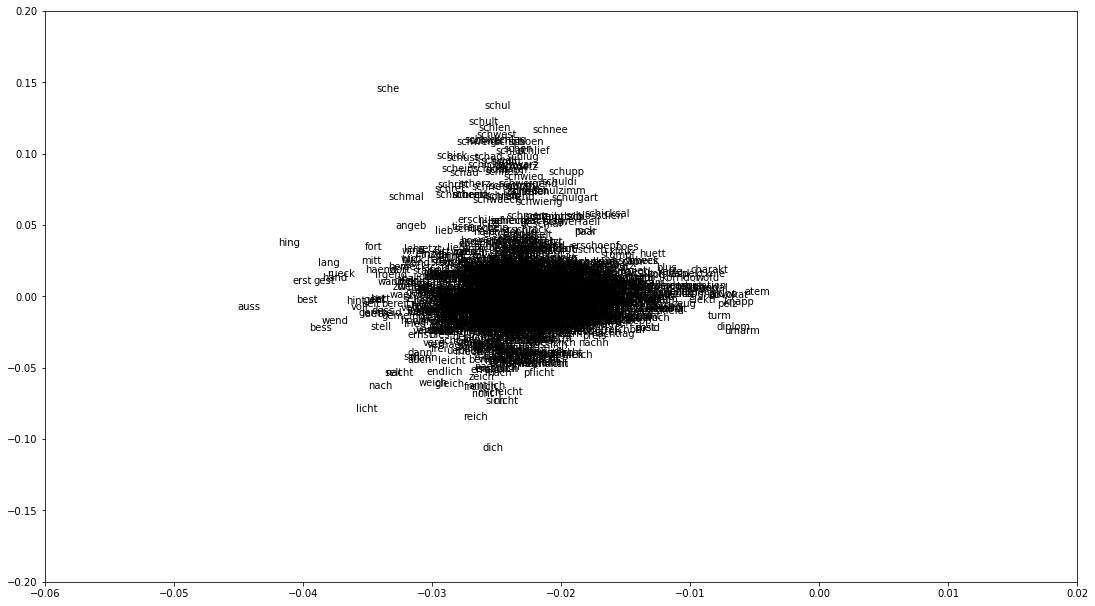

In [23]:
# plots the words
words = model.words
vecs = []
for word in words:
    vecs.append(model.get_word_vector(word))
U, s, Vh = np.linalg.svd(vecs, full_matrices=False)
for i in range(len(words)):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.text(U[i, 0], U[i, 1], words[i])
    plt.xlim((-0.06, 0.02))
    plt.ylim((-0.2, 0.2))
plt.show()

In [11]:
# little examples to show how it works
print("neighbors of schloss: ")
print(model.get_nearest_neighbors('schloss'))
print("neighbors of sagt: ")
print(model.get_nearest_neighbors('sagt'))
print("neighbors of zurueck: ")
print(model.get_nearest_neighbors('zurueck'))

neighbors of schloss: 
[(0.9999920725822449, 'entschloss'), (0.9999919533729553, 'schlossdien'), (0.9999917149543762, 'geschloss'), (0.9999917149543762, 'verschloss'), (0.999990701675415, 'schliess'), (0.9999895691871643, 'schwarz'), (0.9999883770942688, 'schlafend'), (0.9999876618385315, 'schlimm'), (0.9999873042106628, 'ausschliess'), (0.9999867677688599, 'scherz')]
neighbors of sagt: 
[(0.9999872446060181, 'gefragt'), (0.9999838471412659, 'fragt'), (0.999982476234436, 'gesagt'), (0.9999805688858032, 'vorausgesetzt'), (0.9999804496765137, 'vorwaert'), (0.9999803304672241, 'traegt'), (0.999980092048645, 'befriedigt'), (0.999979555606842, 'geaendert'), (0.9999794363975525, 'gewartet'), (0.9999794363975525, 'laech')]
neighbors of zurueck: 
[(0.999995768070221, 'zurueckhalt'), (0.9999948740005493, 'zurueckkomm'), (0.999994158744812, 'rueck'), (0.9999927878379822, 'zurueckgezog'), (0.9999911785125732, 'unglueck'), (0.9999909400939941, 'ausgebreitet'), (0.999990701675415, 'ausdrueck'), (0.

In [16]:
# little examples to show how it works
print("analogies of sagt -> denkt, schloss -> x: ")
print(model.get_analogies("sagt", "denkt", "schloss"))
print("analogies of still -> laut, leer -> x: ")
print(model.get_analogies("still", "laut", "leer"))
print("analogies of alt -> neu, ziel -> x: ")
print(model.get_analogies("alt", "neu", "ziel"))
print("analogies of wirt -> graf, schloss -> x: ")
print(model.get_analogies("wirt", "graf", "schloss"))

analogies of sagt -> denkt, schloss -> x: 
[(0.9999514818191528, 'aufenthalt'), (0.9999514818191528, 'tasch'), (0.9999513030052185, 'gegenwaert'), (0.9999510645866394, 'schlossdien'), (0.9999504089355469, 'unterbrech'), (0.9999503493309021, 'fuegt'), (0.9999498724937439, 'erklaert'), (0.9999497532844543, 'entschloss'), (0.9999496936798096, 'betret'), (0.9999493956565857, 'schwierig')]
analogies of still -> laut, leer -> x: 
[(0.9999433755874634, 'gefund'), (0.9999419450759888, 'selbstaend'), (0.9999414682388306, 'vergess'), (0.999941349029541, 'voll'), (0.9999411702156067, 'fuer'), (0.9999411702156067, 'verabschied'), (0.9999410510063171, 'daraus'), (0.9999408721923828, 'fuerchtet'), (0.9999406933784485, 'beachtet'), (0.9999406337738037, 'beantwortet')]
analogies of alt -> neu, ziel -> x: 
[(0.9994964003562927, 'abend'), (0.9994917511940002, 'fahrt'), (0.9994845986366272, 'alle'), (0.9994807839393616, 'gesproch'), (0.9994799494743347, 'begnuegt'), (0.999478280544281, 'allzu'), (0.99947